In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
moz_df= df[(df['country_name'] == 'Mozambique')]
moz_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
3319,MOZ,Mozambique,1971,NaN,NaN,3611010,NaN,0.0,0.0,500.0,...,0.0,0.0,0.0,0.0,0.0,5415.357955,500.0,2.299782,9232655,-0.063
3320,MOZ,Mozambique,1975,NaN,NaN,2882439,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,737.825873,1.0,2.573385,10165216,-0.165
3321,MOZ,Mozambique,1977,NaN,NaN,2706439,NaN,0.0,0.0,300.0,...,0.0,0.0,0.0,55500.0,55500.0,3724.741596,303.0,2.781533,10738534,0.443
3322,MOZ,Mozambique,1978,NaN,NaN,2865849,NaN,0.0,0.0,40.0,...,0.0,0.0,0.0,63000.0,63000.0,2536.002174,44.0,2.779569,11041206,0.340
3323,MOZ,Mozambique,1979,NaN,NaN,2634568,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,52905.387532,0.0,2.682591,11341405,0.097


In [4]:
moz_df= moz_df.drop(['country_name'], axis=1)
moz_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [5]:
moz_df= moz_df[(moz_df['year'] >= 1994) & (moz_df['year'] <= 2020)]
moz_df.set_index('year',inplace = True)
moz_df.head(30)

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1994,MOZ,1.144514e+09,30.522250,1079627,49.899398,0.0,0.0,0.0,240.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,13379.716350,240.0,3.937205,14948050,0.083
1996,MOZ,1.394244e+09,30.937262,1091814,49.674823,0.0,0.0,0.0,11.0,0.0,...,0.375959,0.0,0.093990,14500.0,14500.0,1253.132832,11.0,3.035294,15960445,0.180
1997,MOZ,1.521221e+09,30.264298,1170237,10.693586,0.0,0.0,35.0,0.0,0.0,...,0.001076,0.0,0.000269,50.0,50.0,2439.470635,35.0,2.699559,16397175,0.224
1998,MOZ,1.649743e+09,27.223152,1111895,5.954267,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,2.509960,16813946,0.940
1999,MOZ,1.751140e+09,22.936551,1168343,9.353415,0.0,0.0,23.0,0.0,0.0,...,0.000000,0.0,0.051871,12400.0,12400.0,405.938297,23.0,2.526580,17244176,0.276
2000,MOZ,1.533833e+09,19.095205,1321945,11.497545,0.0,0.0,800.0,32.0,0.0,...,0.017679,0.0,1.857164,420200.0,420200.0,25408.480126,832.0,2.676368,17711925,0.351
2001,MOZ,1.689469e+09,18.248490,1553994,15.772099,9.0,0.0,79.0,0.0,0.0,...,0.000000,0.0,0.166711,36000.0,36000.0,7953.715289,88.0,2.838515,18221884,0.492
2002,MOZ,1.885336e+09,22.799956,1537057,10.041136,0.0,0.0,0.0,3.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,3.0,2.932469,18764147,0.625
2003,MOZ,1.985351e+09,22.705634,1855517,4.345439,9.0,0.0,38.0,11.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,3401.272567,58.0,2.976707,19331097,0.641


In [6]:
moz_df = moz_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
moz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1994 to 2020
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               25 non-null     float64
 1   agriculture_value_added_percentage_gdp          25 non-null     float64
 2   annual_co2_emissions_tons                       25 non-null     int64  
 3   inflation_inflation_gdp_deflation               25 non-null     float64
 4   economic_damages_as_a_share_of_gdp              25 non-null     float64
 5   people_affected_per_100k                        25 non-null     float64
 6   number_of_deaths                                25 non-null     float64
 7   population_population_growth_annual_percentage  25 non-null     float64
 8   population_population_total                     25 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [7]:
moz_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel 

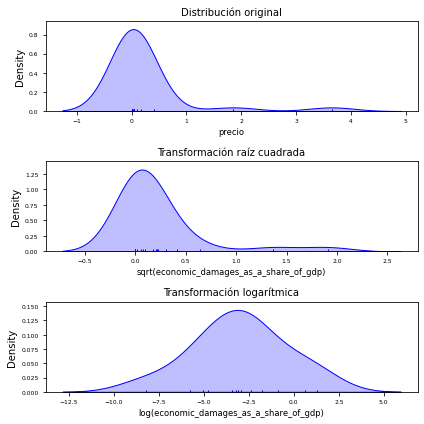

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    moz_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(moz_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(moz_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [9]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(moz_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,107.128569,2002.368165,49.254350,inf,0.480000,8.067538e-06
gamma,246.612187,424.472607,66.880157,inf,0.592300,6.833485e-09
expon,248.857180,1163.519336,63.887835,inf,0.615525,1.207799e-09
lognorm,250.174870,712.722539,67.238736,inf,0.480000,8.067538e-06
exponpow,275.843558,697.023226,69.680579,inf,0.477151,9.412349e-06
powerlaw,287.874683,322.731291,70.747863,inf,0.669040,1.461496e-11
chi2,292.116639,375.817682,71.113561,inf,0.692644,1.689533e-12
logistic,324.062651,1250.818116,70.489278,inf,0.418801,1.730706e-04
norm,346.573604,720.577419,72.168236,inf,0.424555,1.325289e-04
cauchy,355.007700,1997.092788,72.769343,inf,0.481303,7.515479e-06


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [10]:
# Visualize the data using scatter plot and histogram
#sb.set_palette('colorblind')
#sb.pairplot(data=hti_df, height=3)

In [11]:
moz_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,-0.124145,0.871134,-0.557494,0.135850,-0.236445,-0.039448,-0.172390,0.991248,0.614376
agriculture_value_added_percentage_gdp,-0.124145,1.000000,-0.151253,0.448819,-0.230473,-0.306926,-0.308505,0.332833,-0.178855,-0.305418
annual_co2_emissions_tons,0.871134,-0.151253,1.000000,-0.331784,0.181638,-0.075571,0.060279,0.000277,0.895974,0.595292
inflation_inflation_gdp_deflation,-0.557494,0.448819,-0.331784,1.000000,-0.055983,0.283520,0.081782,0.703254,-0.536042,-0.487388
economic_damages_as_a_share_of_gdp,0.135850,-0.230473,0.181638,-0.055983,1.000000,0.446876,0.874798,-0.029697,0.193036,0.188189
people_affected_per_100k,-0.236445,-0.306926,-0.075571,0.283520,0.446876,1.000000,0.735411,0.294866,-0.157336,-0.072665
number_of_deaths,-0.039448,-0.308505,0.060279,0.081782,0.874798,0.735411,1.000000,0.098136,0.026389,-0.011836
population_population_growth_annual_percentage,-0.172390,0.332833,0.000277,0.703254,-0.029697,0.294866,0.098136,1.000000,-0.134082,-0.235154
population_population_total,0.991248,-0.178855,0.895974,-0.536042,0.193036,-0.157336,0.026389,-0.134082,1.000000,0.638546
temperature_change_temp_change_celsius,0.614376,-0.305418,0.595292,-0.487388,0.188189,-0.072665,-0.011836,-0.235154,0.638546,1.000000


In [12]:
moz_corr_df = moz_df.corr(method='spearman')

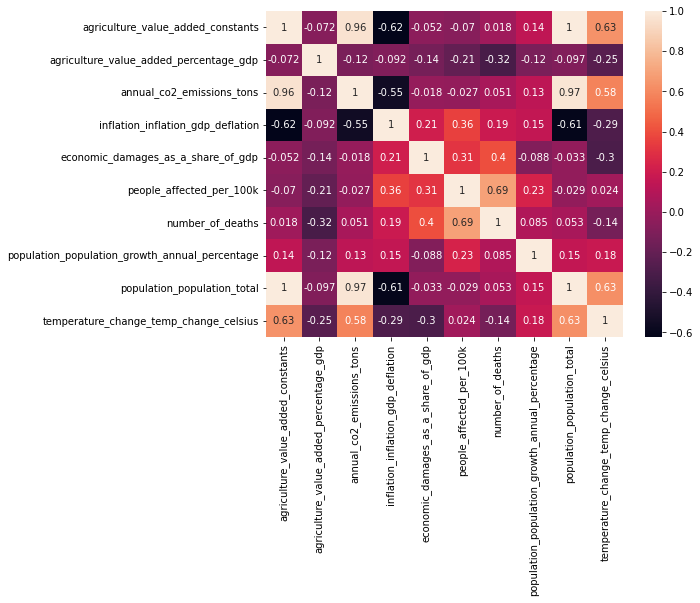

In [13]:
plt.figure(figsize=(8, 6))
sb.heatmap(moz_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [14]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.6385461432805848
Correlación spearman:  0.6255049163601217
Correlación kendall:  0.4974965196541624


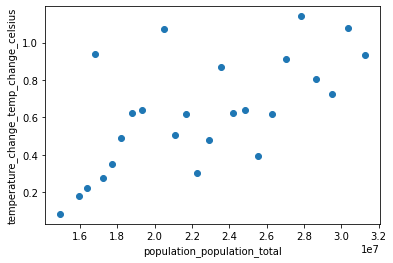

In [15]:
plt.scatter(moz_df.population_population_total , moz_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [16]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.23515380539980227
Correlación spearman:  0.18003462537302395
Correlación kendall:  0.1435728211082482


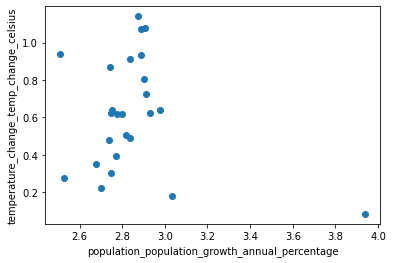

In [17]:
plt.scatter(moz_df.population_population_growth_annual_percentage, moz_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [18]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.5952921894265274
Correlación spearman:  0.5778034344236794
Correlación kendall:  0.4574296858565118


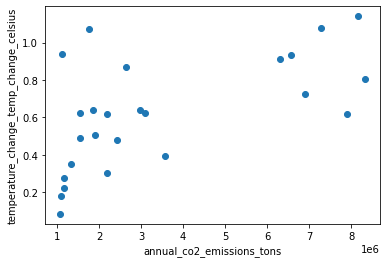

In [19]:
plt.scatter(moz_df.annual_co2_emissions_tons, moz_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [20]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.188188766452868
Correlación spearman:  -0.3037885882718862
Correlación kendall:  -0.21927265274318034


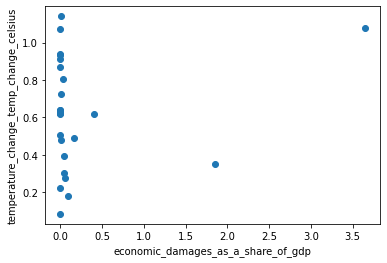

In [21]:
plt.scatter(moz_df.economic_damages_as_a_share_of_gdp, moz_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [22]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [23]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  -0.011836114648118
Correlación spearman:  -0.14095904858476724
Correlación kendall:  -0.101012391332778


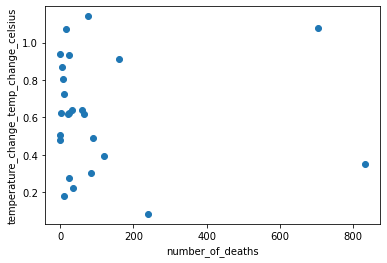

In [24]:
plt.scatter(moz_df.number_of_deaths, moz_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
# Correlación sin outlier
#Pendiente


In [26]:
print('Correlación Pearson: ', moz_df['number_of_deaths'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', moz_df['number_of_deaths'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', moz_df['number_of_deaths'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.8747984132559343
Correlación spearman:  0.39857089736525547
Correlación kendall:  0.31210082429492014


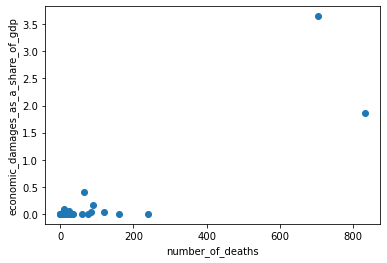

In [27]:
plt.scatter(moz_df.number_of_deaths, moz_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [28]:
# Correlación sin outlier
#Pendiente


In [29]:
print('Correlación Pearson: ', moz_df['people_affected_per_100k'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', moz_df['people_affected_per_100k'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', moz_df['people_affected_per_100k'].corr(moz_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.44687614171688295
Correlación spearman:  0.3122812653222637
Correlación kendall:  0.2478173808888253


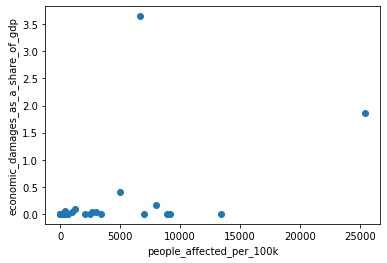

In [30]:
plt.scatter(moz_df.people_affected_per_100k, moz_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [31]:
# Correlación sin outlier
#Pendiente


In [32]:
print('Correlación Pearson: ', moz_df['economic_damages_as_a_share_of_gdp'].corr(moz_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', moz_df['economic_damages_as_a_share_of_gdp'].corr(moz_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', moz_df['economic_damages_as_a_share_of_gdp'].corr(moz_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  -0.055982653235250944
Correlación spearman:  0.20955342704741114
Correlación kendall:  0.15097027121927942


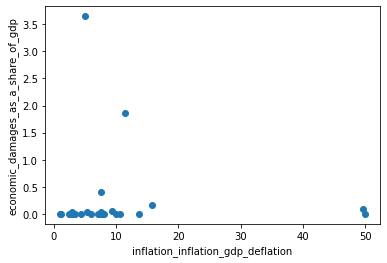

In [33]:
plt.scatter(moz_df.inflation_inflation_gdp_deflation, moz_df.economic_damages_as_a_share_of_gdp)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [34]:
print('Correlación Pearson: ', moz_df['inflation_inflation_gdp_deflation'].corr(moz_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', moz_df['inflation_inflation_gdp_deflation'].corr(moz_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', moz_df['inflation_inflation_gdp_deflation'].corr(moz_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  -0.5574937158989521
Correlación spearman:  -0.6238461538461538
Correlación kendall:  -0.4799999999999999


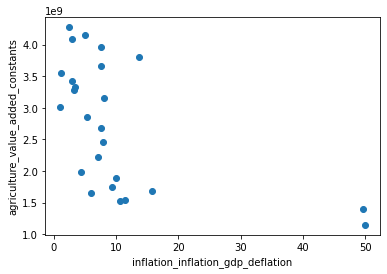

In [35]:
plt.scatter(moz_df.inflation_inflation_gdp_deflation, moz_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [36]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(moz_df['temperature_change_temp_change_celsius'], moz_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(moz_df['temperature_change_temp_change_celsius'], moz_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(moz_df['temperature_change_temp_change_celsius'], moz_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.6385461432805848, p-value=0.0005922919957477977
Correlación Spearman: r=0.6255049163601217, p-value=0.0008263766857966909
Correlación Pearson: r=0.4974965196541624, p-value=0.0004998444852466285


## Normalizando una variable 

In [37]:
normalized_ND_2 = moz_df['number_of_deaths']/np.linalg.norm(moz_df['number_of_deaths'])
moz_df = moz_df.assign(normalized_ND_2=normalized_ND_2)
moz_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1994,1.144514e+09,30.522250,1079627,49.899398,0.000000,13379.716350,240.0,3.937205,14948050,0.083,0.209057
1996,1.394244e+09,30.937262,1091814,49.674823,0.093990,1253.132832,11.0,3.035294,15960445,0.180,0.009582
1997,1.521221e+09,30.264298,1170237,10.693586,0.000269,2439.470635,35.0,2.699559,16397175,0.224,0.030487
1998,1.649743e+09,27.223152,1111895,5.954267,0.000000,0.000000,0.0,2.509960,16813946,0.940,0.000000
1999,1.751140e+09,22.936551,1168343,9.353415,0.051871,405.938297,23.0,2.526580,17244176,0.276,0.020035


In [38]:
print('Correlación Pearson: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', moz_df['temperature_change_temp_change_celsius'].corr(moz_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  -0.011836114648118021
Correlación spearman:  -0.14095904858476724
Correlación kendall:  -0.101012391332778


In [39]:
normalized_EDPGDP = moz_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(moz_df['economic_damages_as_a_share_of_gdp'])
moz_df = moz_df.assign(normalized_EDPGDP=normalized_EDPGDP)
moz_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1994,1.144514e+09,30.522250,1079627,49.899398,0.000000,13379.716350,240.0,3.937205,14948050,0.083,0.209057,0.000000
1996,1.394244e+09,30.937262,1091814,49.674823,0.093990,1253.132832,11.0,3.035294,15960445,0.180,0.009582,0.022828
1997,1.521221e+09,30.264298,1170237,10.693586,0.000269,2439.470635,35.0,2.699559,16397175,0.224,0.030487,0.000065
1998,1.649743e+09,27.223152,1111895,5.954267,0.000000,0.000000,0.0,2.509960,16813946,0.940,0.000000,0.000000
1999,1.751140e+09,22.936551,1168343,9.353415,0.051871,405.938297,23.0,2.526580,17244176,0.276,0.020035,0.012598


In [40]:
# Set independent and dependent variables
X = moz_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = moz_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(25,)
Intercept: -0.07574166833876608
Coefficients: [3.79359906e-09 7.09321500e-02 2.33852997e-09]


In [41]:
X = moz_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(moz_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.3266
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.806
Time:                        23:23:14   Log-Likelihood:                 6.5859
No. Observations:                  25   AIC:                            -5.172
Df Residuals:                      21   BIC:                           -0.2963
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [42]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.04457259854558948


In [43]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.3265639956988554
Probability of observing value at least as high as F-statistic: 0.8061404562292441


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [44]:
print(olsmod.pvalues)

const                                     0.818491
population_population_total               0.850694
temperature_change_temp_change_celsius    0.700310
annual_co2_emissions_tons                 0.948793
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [45]:
# Set independent and dependent variables
X = moz_df[['normalized_EDPGDP']]
y = moz_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 10.402325655044043
Coefficients: [-3.60194284]


In [46]:
X = moz_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(moz_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.003
Model:                                           OLS   Adj. R-squared:                 -0.040
Method:                                Least Squares   F-statistic:                   0.07231
Date:                               Sat, 27 Aug 2022   Prob (F-statistic):              0.790
Time:                                       23:23:14   Log-Likelihood:                -98.049
No. Observations:                                 25   AIC:                             200.1
Df Residuals:                                     23   BIC:                             202.5
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [47]:
print(olsmod.pvalues)

const                0.000752
normalized_EDPGDP    0.790400
dtype: float64


## Encoding

In [48]:
moz_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1994,1.144514e+09,30.522250,1079627,49.899398,0.000000,13379.716350,240.0,3.937205,14948050,0.083,0.209057,0.000000
1996,1.394244e+09,30.937262,1091814,49.674823,0.093990,1253.132832,11.0,3.035294,15960445,0.180,0.009582,0.022828
1997,1.521221e+09,30.264298,1170237,10.693586,0.000269,2439.470635,35.0,2.699559,16397175,0.224,0.030487,0.000065
1998,1.649743e+09,27.223152,1111895,5.954267,0.000000,0.000000,0.0,2.509960,16813946,0.940,0.000000,0.000000
1999,1.751140e+09,22.936551,1168343,9.353415,0.051871,405.938297,23.0,2.526580,17244176,0.276,0.020035,0.012598


In [49]:
moz_df = moz_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
moz_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1994,1.144514e+09,30.522250,1079627,49.899398,0.000000,13379.716350,240.0,3.937205,14948050,0.083
1996,1.394244e+09,30.937262,1091814,49.674823,0.093990,1253.132832,11.0,3.035294,15960445,0.180
1997,1.521221e+09,30.264298,1170237,10.693586,0.000269,2439.470635,35.0,2.699559,16397175,0.224
1998,1.649743e+09,27.223152,1111895,5.954267,0.000000,0.000000,0.0,2.509960,16813946,0.940
1999,1.751140e+09,22.936551,1168343,9.353415,0.051871,405.938297,23.0,2.526580,17244176,0.276


In [50]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(moz_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,-1.631666,1.917717,-0.929207,3.245388,-0.324775,1.649815,0.659737,4.306694,-1.575563,-1.850842
1,-1.376240,2.056010,-0.924419,3.227039,-0.204767,-0.494023,-0.463032,0.737014,-1.364770,-1.517164
2,-1.246367,1.831760,-0.893604,0.041980,-0.324432,-0.284292,-0.345362,-0.591792,-1.273837,-1.365806
3,-1.114914,0.818368,-0.916528,-0.345258,-0.324775,-0.715562,-0.516964,-1.342209,-1.187060,1.097213
4,-1.011203,-0.610044,-0.894349,-0.067522,-0.258546,-0.643797,-0.404197,-1.276426,-1.097481,-1.186927


In [51]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               25 non-null     float64
 1   agriculture_value_added_percentage_gdp          25 non-null     float64
 2   annual_co2_emissions_tons                       25 non-null     float64
 3   inflation_inflation_gdp_deflation               25 non-null     float64
 4   economic_damages_as_a_share_of_gdp              25 non-null     float64
 5   people_affected_per_100k                        25 non-null     float64
 6   number_of_deaths                                25 non-null     float64
 7   population_population_growth_annual_percentage  25 non-null     float64
 8   population_population_total                     25 non-null     float64
 9   temperature_change_temp_change_celsius       

### Dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel 

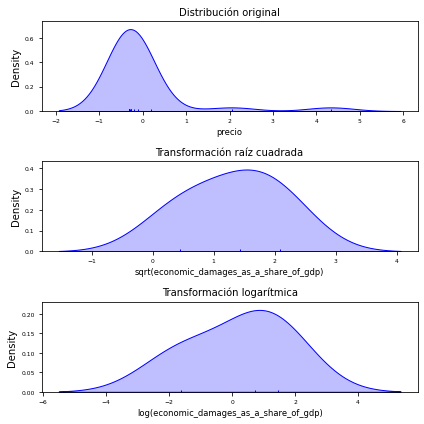

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [53]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,82.255082,1434.433693,42.649237,inf,0.479999,8.067813e-06
gamma,131.827939,533.389025,51.222171,inf,0.484922,6.164208e-06
powerlaw,143.447108,460.908639,53.333891,inf,0.479855,8.131099e-06
expon,152.648537,1212.393438,51.669309,inf,0.615525,1.207799e-09
exponpow,153.729223,652.116500,55.064551,inf,0.474605,1.079242e-05
chi2,167.516913,469.007016,57.211840,inf,0.659333,3.411857e-11
lognorm,185.593453,872.618158,59.773695,inf,0.470926,1.313019e-05
logistic,198.779435,1299.692218,58.270752,inf,0.418801,1.730706e-04
norm,212.587613,769.451521,59.949711,inf,0.424555,1.325289e-04
cauchy,217.752258,2045.665894,60.549806,inf,0.481525,7.424879e-06


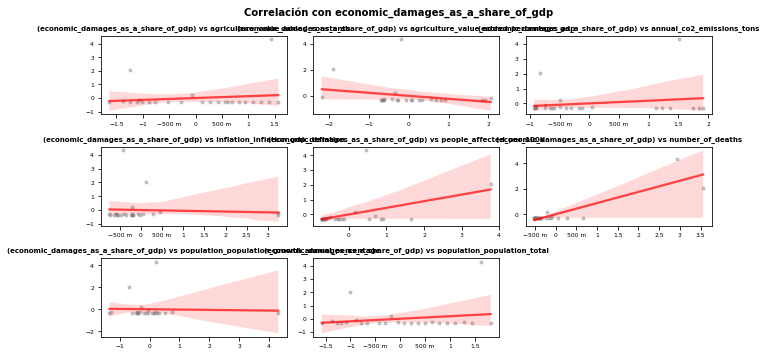

In [54]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

### linear regression on a dataset with outliers

(25, 1) (25,)


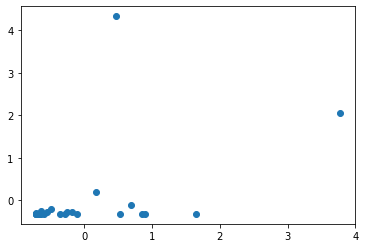

In [55]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

Mean MAE: 0.452 (0.570)
The parameters of the line: [0.44687614]


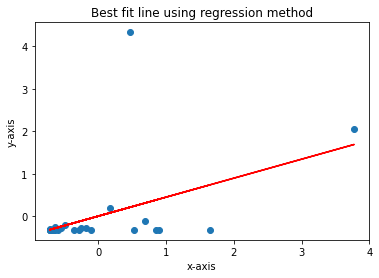

In [56]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('Best fit line using regression method')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [57]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))




Mean MAE: 0.388 (0.649)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [58]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit


Mean MAE: 0.345 (0.672)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [59]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

(25, 1)
(25,)
Mean MAE: 0.355 (0.642)


### Comparison

>Linear 0.452 (0.570)
>Huber 0.388 (0.649)
>RANSAC 0.345 (0.672)
>TheilSen 0.362 (0.662)


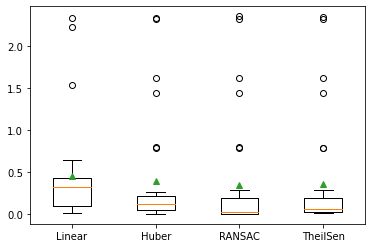

In [60]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

(25, 1)


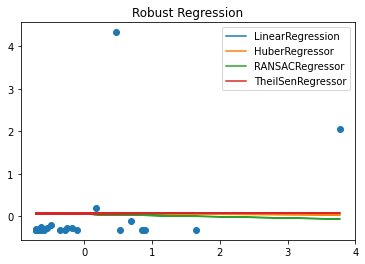

In [61]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print (X.shape)

# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load the dataset
X = df_scaled['people_affected_per_100k']
y = df_scaled['economic_damages_as_a_share_of_gdp']

# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():

# plot the line of best fit
	plot_best_fit(X, y_pred, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()




### Training and testing the linear regression model

In [62]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [63]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [64]:
print(Y_pred_multiple)
print(y_test)

[ 1.6227322  -0.26678615 -0.40338656 -0.37857167 -0.38921069]
23    4.330282
11    0.197517
21   -0.283725
4    -0.258546
9    -0.324775
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [65]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[-0.03967699  0.02052398  0.59554151]
Valor de la intersección o coeficiente "b":
-0.13903909417654856


In [66]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.8880249841114465


In [67]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.888
Model:                                            OLS   Adj. R-squared:                  0.867
Method:                                 Least Squares   F-statistic:                     42.30
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):           7.83e-08
Time:                                        23:23:19   Log-Likelihood:                 6.8213
No. Observations:                                  20   AIC:                            -5.643
Df Residuals:                                      16   BIC:                            -1.660
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                             coef 

In [68]:
print(modelo.pvalues)

const                                     0.006154
people_affected_per_100k                  0.628645
temperature_change_temp_change_celsius    0.670873
number_of_deaths                          0.000024
dtype: float64


In [69]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.232516,-0.045562
people_affected_per_100k,-0.210256,0.130902
temperature_change_temp_change_celsius,-0.079984,0.121032
number_of_deaths,0.380058,0.811025


### Complete model without split

In [70]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -8.039214044573895e-17
Coefficients: [-0.13765477  0.14265821 -0.41983417  1.18377137 -0.05166563  0.15199737
  0.21396065]


## Model Validation

In [71]:
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.886
Model:                                            OLS   Adj. R-squared:                  0.839
Method:                                 Least Squares   F-statistic:                     18.89
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):           7.36e-07
Time:                                        23:23:19   Log-Likelihood:                -8.3183
No. Observations:                                  25   AIC:                             32.64
Df Residuals:                                      17   BIC:                             42.39
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                                                  

In [72]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.8860980067990061


In [73]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 18.89301707327261
Probability of observing value at least as high as F-statistic: 7.360332469008347e-07


In [74]:
print(olsmod_scaled.pvalues)

const                                             1.000000e+00
annual_co2_emissions_tons                         5.094382e-01
inflation_inflation_gdp_deflation                 3.769055e-01
people_affected_per_100k                          5.910204e-03
number_of_deaths                                  4.130677e-08
population_population_growth_annual_percentage    6.942572e-01
population_population_total                       5.248967e-01
temperature_change_temp_change_celsius            7.406495e-02
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [75]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.2146937906920717e-17
Coefficients: [0.44687614]


In [76]:
X = df_scaled[['people_affected_per_100k',]]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.200
Model:                                            OLS   Adj. R-squared:                  0.165
Method:                                 Least Squares   F-statistic:                     5.739
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):             0.0251
Time:                                        23:23:19   Log-Likelihood:                -32.689
No. Observations:                                  25   AIC:                             69.38
Df Residuals:                                      23   BIC:                             71.82
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

In [77]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.19969828603576767


In [78]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 5.7391612421661415
Probability of observing value at least as high as F-statistic: 0.025120707412977717


In [79]:
print(olsmod_scaled.pvalues)

const                       1.000000
people_affected_per_100k    0.025121
dtype: float64


In [80]:
df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

In [81]:
df_scaled['predictions'] = olsmod.predict(X)

/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


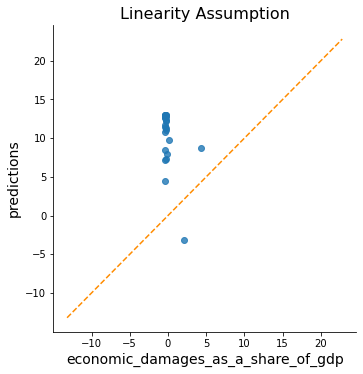

In [82]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 5.801057516997691e-11


/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


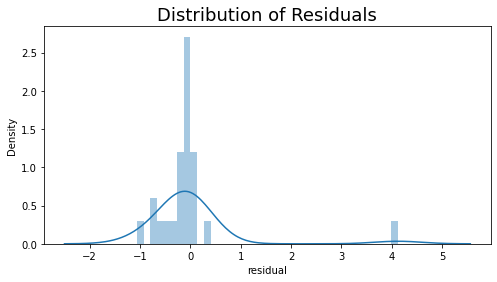

Residuals are not normally distributed


In [83]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                     people_affected_per_100k  \
people_affected_per_100k                            1.000000   
economic_damages_as_a_share_of_gdp                  0.446876   

                                    economic_damages_as_a_share_of_gdp  
people_affected_per_100k                                      0.446876  
economic_damages_as_a_share_of_gdp                            1.000000  


/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


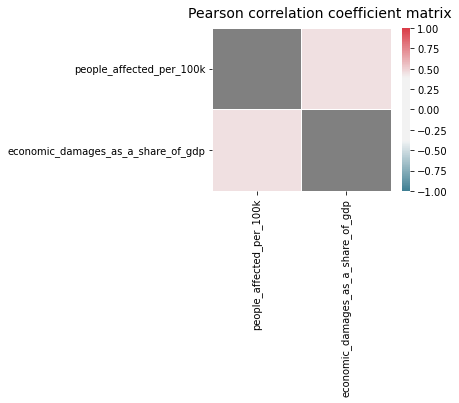

In [84]:
corr = df_scaled[['people_affected_per_100k','economic_damages_as_a_share_of_gdp']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [85]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.199969424313065
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

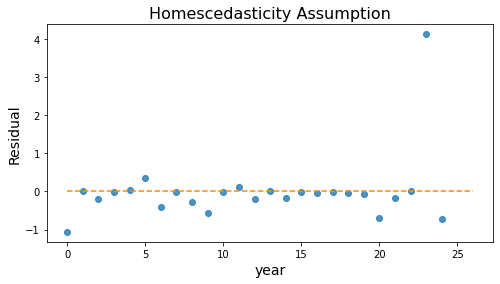

In [86]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Huber Model

In [87]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define the model
model = HuberRegressor()
#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = regr.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

Mean MAE: 0.388 (0.649)


In [88]:
print(Y_pred)
print(y_test)

[-0.26786896 -0.1129475  -0.31717085 -0.29888152 -0.31976746]
19   -0.324775
21   -0.283725
13   -0.316738
15   -0.324775
7    -0.324775
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [89]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: -0.2435849764945343
Coefficients: [0.11787562]


In [90]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.007472506462144701


/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3.7/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/cielomejia/opt/anaconda3/envs/mlenvir/lib/python3